# Forecast predictions in offshore and coastal points
# all over the world

### please contact jtausiahoyal@gmail.com for more information

With this jupyter notebook, forecasts of the waves can be done all over the world just running all the cells below. Data is downloaded from the [NOAA](https://www.noaa.gov/) website and used for the local predictions. In case the methodology followed wanna be studied in detail, refer to the Forecast class in the repository, and to all the available notebooks as they explain step by step the procedure.

But briefly explained, this notebook download the data, save and plot it and then, reconstruct the predictions using RBF in coastal points using the previously propagated cases with SWAN (refer to the notebooks and the paper in the repo for more information).

In [1]:
# basic imports
import sys
import os
import os.path as op
import datetime

# dev library
sys.path.insert(0, op.join(os.path.abspath('')))

# Forecast module
from forecast import Forecast

Pulling the data from: 

https://nomads.ncep.noaa.gov:9090/dods/wave/mww3/20200804/multi_1.glo_30mext20200804_00z


The times with forecast go from 2020-08-05 00:00:00 to 2020-08-12 12:00:00 

Generating images and GIF in "path"... 

Plotting time: 2020-08-05 00:00:00...
Plotting time: 2020-08-06 00:00:00...
Plotting time: 2020-08-07 00:00:00...
Plotting time: 2020-08-08 00:00:00...
Plotting time: 2020-08-09 00:00:00...
Plotting time: 2020-08-10 00:00:00...
Plotting time: 2020-08-11 00:00:00...
Plotting time: 2020-08-12 00:00:00...

 GIF generated and saved!! 



<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    title: Multi-grid wave model: Global 30 arc-min grid from 00Z04aug2020 downloaded Aug 04 04:24 UTC
    Conventions: COARDS
GrADS
    dataType: Grid
    history: Tue Aug 04 05:18:49 GMT 2020 : imported by GrADS Data Server 2.0
    dimensions(sizes): lat(336), lon(720), time(61)
    variables(dimensions): float64 time(time), float64

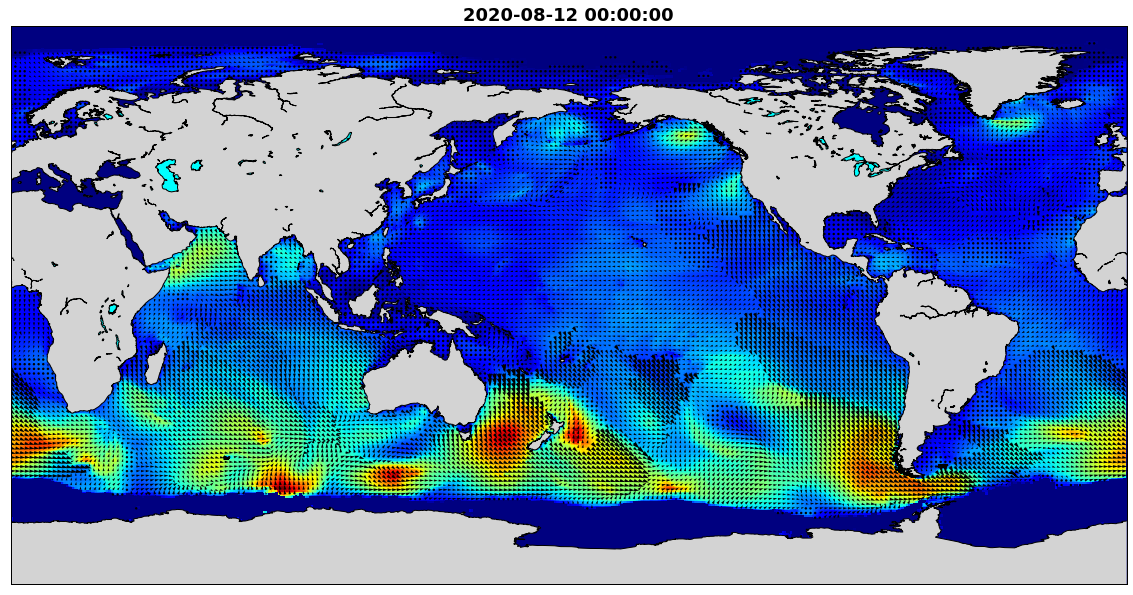

In [2]:
date         = datetime.date.today() # today or ex: '20200707'
date         = date.strftime("%Y%m%d")
images_path  = op.join(os.getcwd(), '..', 'images', 'forecast') # save images and GIF
location     = (0, 0) # location to see the forecast

forecast = Forecast(date=date, 
                    images_path=images_path, 
                    location=location)

print(forecast.forecast)

In [3]:
new_location = forecast.select_precise_location()

Move the marker to the exact position: 



Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

In [4]:
forecast_nc, forecast_data = forecast.select_region(marker=new_location,
                                                    delta_lon=0.8, 
                                                    delta_lat=0.8,
                                                    zoom=8)

New location in [-34.33189017356144, 24.916492793709043]!! 

These are the coordinates in the selected region: 

[-35.  -34.5 -34. ]
[24.5 25.  25.5]




Map(center=[-34.33189017356144, 24.916492793709043], controls=(ZoomControl(options=['position', 'zoom_in_text'…

Saving the data in the shown region... 

<xarray.Dataset>
Dimensions:    (lat: 3, lon: 3, time: 61)
Coordinates:
  * time       (time) datetime64[ns] 2020-08-05 ... 2020-08-12T12:00:00
  * lat        (lat) float64 -35.0 -34.5 -34.0
  * lon        (lon) float64 24.5 25.0 25.5
Data variables:
    Hsea       (time, lat, lon) float32 3.25 3.22 3.22 ... 9.999e+20 9.999e+20
    Tpsea      (time, lat, lon) float32 11.05 11.4 ... 9.999e+20 9.999e+20
    Dirsea     (time, lat, lon) float32 240.4 240.62 ... 9.999e+20 9.999e+20
    Hswell1    (time, lat, lon) float32 1.7199999 1.77 1.64 ... 9.999e+20 1.62
    Tpswell1   (time, lat, lon) float32 14.44 14.509999 ... 9.999e+20 11.58
    Dirswell1  (time, lat, lon) float32 224.78 225.45999 ... 9.999e+20 216.12
    Hswell2    (time, lat, lon) float32 0.51 0.59 ... 9.999e+20 0.66999996
    Tpswell2   (time, lat, lon) float32 8.54 8.48 8.4 ... 9.999e+20 8.599999
    Dirswell2  (time, lat, lon) float32 69.86 66.57 ... 9.999e+20 130.09999
    Hs         (

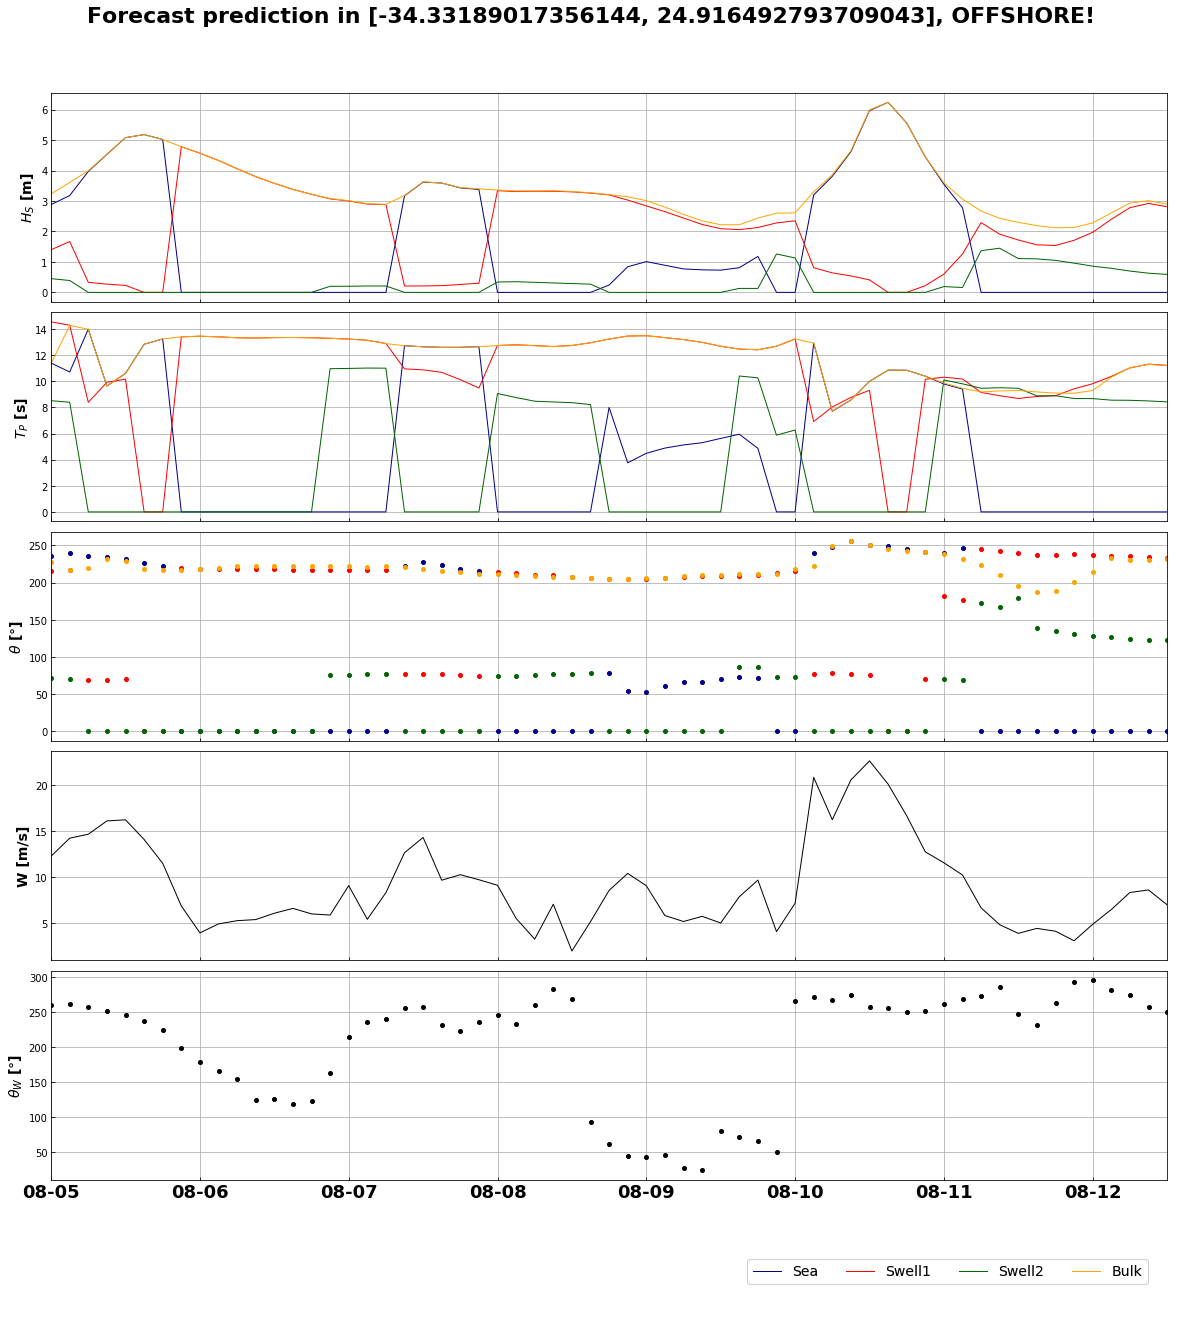

In [5]:
forecast.plot_results(forecast=forecast_data,
                      coast=False)

<div class="alert alert-block alert-info">
<b>Important:</b> In the case that NO propagations have been done using SWAN, then the reconstruction in coast cannot be performed, and the notebook ends here.
</div>

In [6]:
p_data_swan = op.join(os.getcwd(), '..', 'data', 'projects-swan')

# -------------- EDIT THIS PART --------------------------------------------- #
name = 'SAF'               # used name in the SWAN section
resolution = str(0.0042)   # used resolution in the SWAN section
num_cases = str(20)        # num cases run in SWAN
# --------------------------------------------------------------------------- #

# Example coordinates for the forecast reconstruction:
# Sardinero 43.5, -3.75
# Liencres 43.46, -3.97
# Jeffrey's Bay -34.0 24.98

forecast_recon = forecast.forecast_reconstruction(p_data_swan=p_data_swan, 
                                                  forecast_data=forecast_data, 
                                                  name=name, 
                                                  resolution=resolution, 
                                                  num_cases=num_cases)

SUBSETS: 

SEA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hs      20 non-null     float64
 1   per     20 non-null     float64
 2   dir     20 non-null     float64
dtypes: float64(3)
memory usage: 608.0 bytes
None
SWELL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hs      20 non-null     float64
 1   per     20 non-null     float64
 2   dir     20 non-null     float64
dtypes: float64(3)
memory usage: 608.0 bytes
None


Select the desired point to reconstruct as it is given in Google Maps: 

Latitude location to obtain the forecast reconstruction: -34.0
Longitude location to obtain the forecast reconstruction: 
24.98


TARGETS: 

SEA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (t

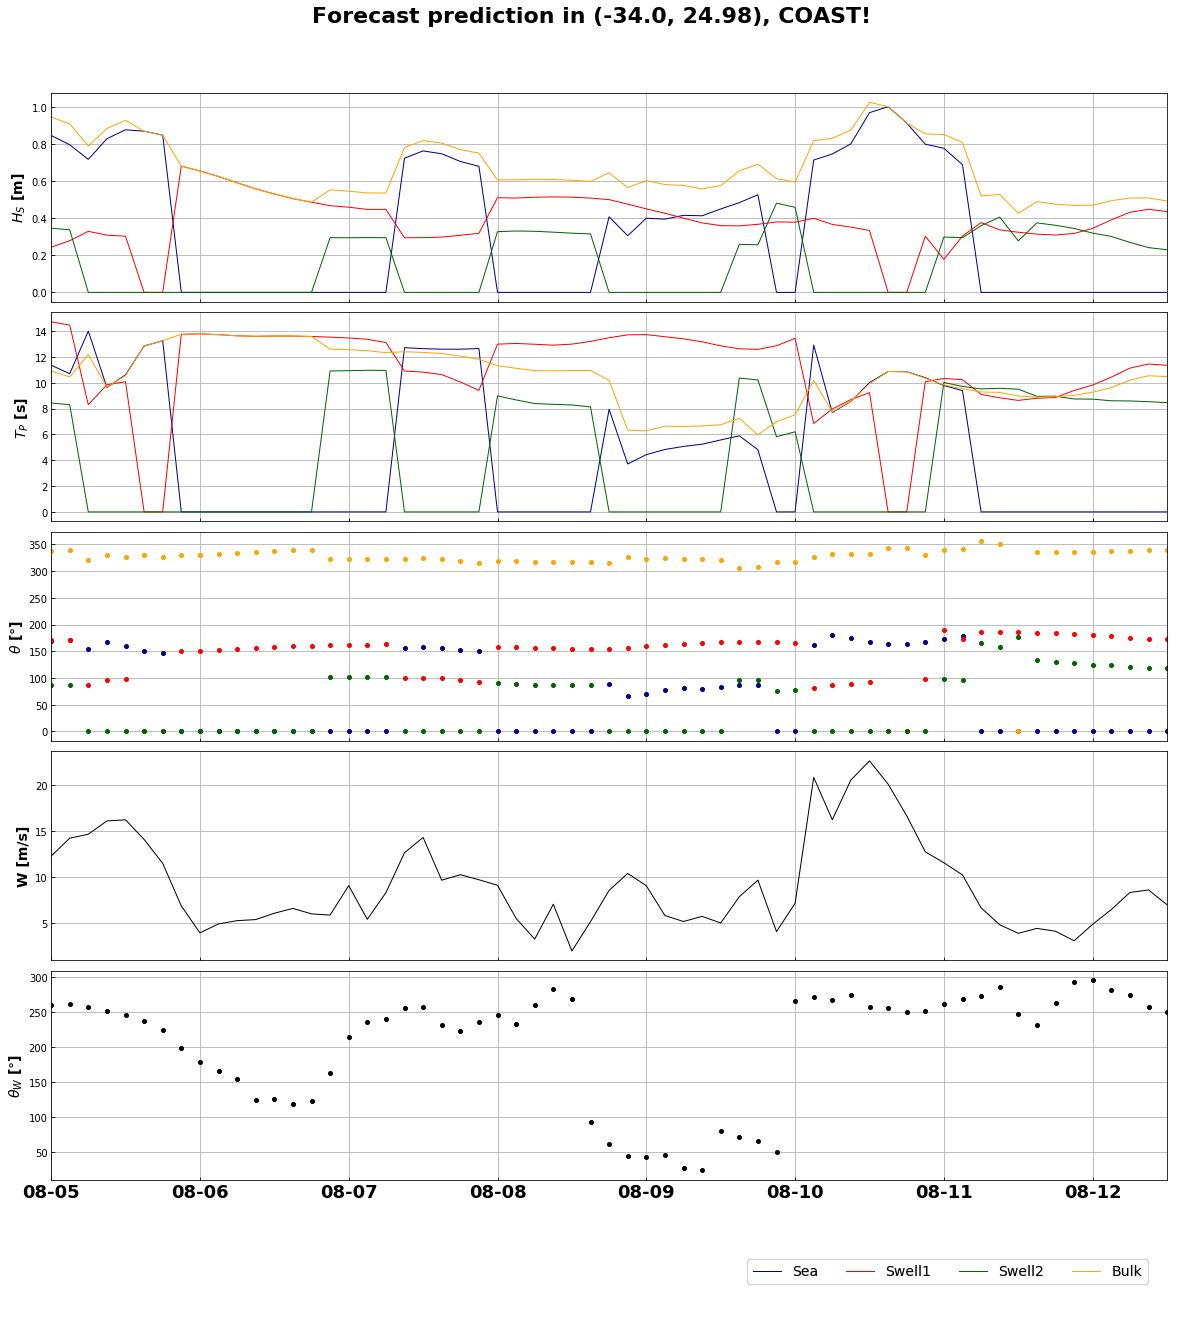

In [7]:
forecast.plot_results(forecast=forecast_recon,
                      coast=True)